# 路径

In [7]:
def setProjectPath(projectPath):
    import os
    import sys
    root=os.path.abspath(projectPath)
    print(root)
    sys.path.append(root)
    os.environ["TORCH_HOME"]=r"E:\Data\torch-model"
    import warnings  
    warnings.filterwarnings("ignore", category=RuntimeWarning, module="mne")

projectPath=r'D:\project_meta\NNproject\NNI'
setProjectPath(projectPath)

D:\project_meta\NNproject\NNI


In [8]:
import mne
datasetFolder=r'D:\dataset\driver_dataset\DROZY\DROZY'
outputFolder=r'D:\project_meta\NNproject\NNI\output'
from project.dataprocess.FolderTree import *
datasetDict=getDataPath(datasetFolder)
outputDict=getOutPath(outputFolder)
import pprint
pprint.pprint(datasetDict)
pprint.pprint(outputDict)

{'annotation_auto_folder': 'D:\\dataset\\driver_dataset\\DROZY\\DROZY\\annotations-auto',
 'annotation_manual_folder': 'D:\\dataset\\driver_dataset\\DROZY\\DROZY\\annotations-manual',
 'kinect_file': 'D:\\dataset\\driver_dataset\\DROZY\\DROZY\\kinect-intrinsics.yaml',
 'kss_file': 'D:\\dataset\\driver_dataset\\DROZY\\DROZY\\KSS.txt',
 'psg_folder': 'D:\\dataset\\driver_dataset\\DROZY\\DROZY\\psg',
 'pvt_rt_folder': 'D:\\dataset\\driver_dataset\\DROZY\\DROZY\\pvt-rt',
 'videos_folder': 'D:\\dataset\\driver_dataset\\DROZY\\DROZY\\videos_i8'}
{'ECG_table_file': 'D:\\project_meta\\NNproject\\NNI\\output\\ECG_table.csv',
 'EEG_table_file': 'D:\\project_meta\\NNproject\\NNI\\output\\EEG_table.csv',
 'bandpower_file': 'D:\\project_meta\\NNproject\\NNI\\output\\bandpower.csv',
 'cwt_folder': 'D:\\project_meta\\NNproject\\NNI\\output\\cwt',
 'filted_folder': 'D:\\project_meta\\NNproject\\NNI\\output\\psg_filted',
 'info_file': 'D:\\project_meta\\NNproject\\NNI\\output\\info.csv',
 'nomalfilted_

In [9]:
edfList=os.listdir(datasetDict['psg_folder'])
print('number of edf file:',len(edfList))
edfFullFilename=os.path.join(datasetDict['psg_folder'],edfList[0])
print(edfFullFilename)

number of edf file: 36
D:\dataset\driver_dataset\DROZY\DROZY\psg\1-1.edf


In [10]:
edffile=mne.io.read_raw_edf(edfFullFilename,verbose=False)
import pandas as pd
print(edffile.info['ch_names'])

['Fz', 'Cz', 'C3', 'C4', 'Pz', 'Oz', 'Cam-Sync', 'PVT', 'EOG-V', 'EOG-H', 'EMG', 'ECG']


In [11]:
print(len(edffile[['Fz', 'Cz', 'C3', 'C4']]))


2


# ecg数据

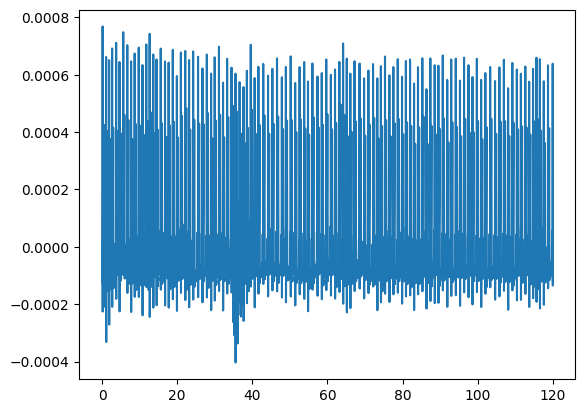

In [12]:
import matplotlib.pyplot as plt
startTime=int(0*512)
endTime=int(120*512)
plt.plot(edffile[['ECG']][1][startTime:endTime],-1*edffile[['ECG']][0][:,startTime:endTime].T)


## 去噪

In [13]:
zaoyin=mne.filter.filter_data(-1*edffile[['ECG']][0],512,l_freq=0,h_freq=0.01)

Setting up low-pass filter at 0.01 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 0.01 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.01 Hz)
- Filter length: 845 samples (1.650 s)



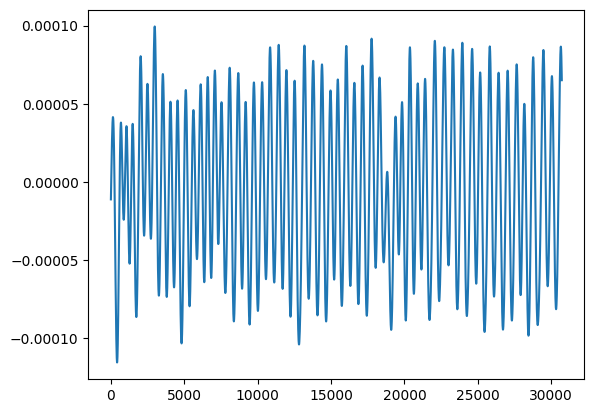

In [14]:
plt.plot(zaoyin[0][:60*512].T)

In [15]:
EEGData=-1*edffile[['ECG']][0]-zaoyin[0]

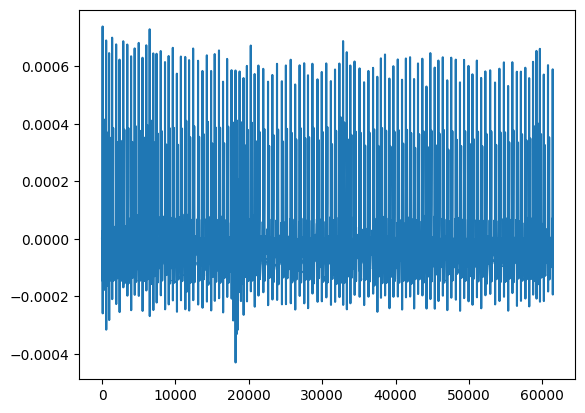

In [16]:
plt.plot(EEGData[0][startTime:endTime].T)

# 提取R峰

In [5]:
import sys
import time
import logging
import numpy as np
from biosppy.signals import ecg
from biosppy.storage import load_txt
import matplotlib.pyplot as plt


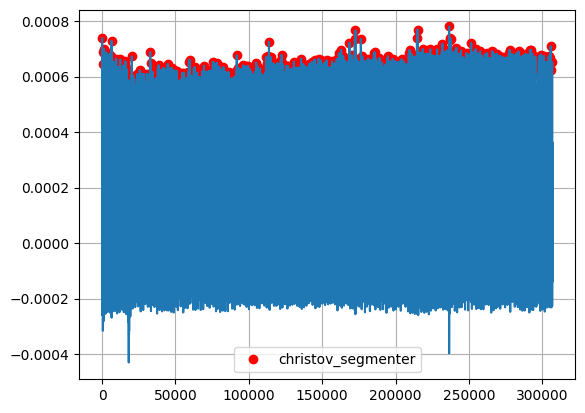

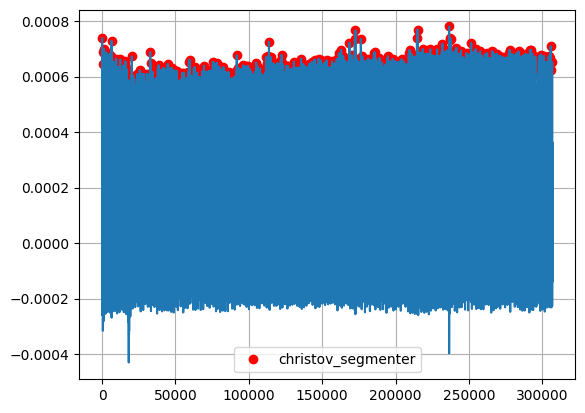

In [50]:
signal=EEGData[0].T
sfreq=512
rpeaks0=ecg.hamilton_segmenter(signal,sfreq)
rpeaks1=ecg.hamilton_segmenter(-1*signal,sfreq)
plt.figure()
plt.grid(True)
plt.plot(rpeaks0[0], signal[rpeaks0[0]], "ro", label="christov_segmenter")
plt.plot(signal)
plt.legend()
plt.show()
plt.figure()
plt.grid(True)
plt.plot(rpeaks1[0], signal[rpeaks1[0]], "ro", label="christov_segmenter")
plt.plot(signal)
plt.legend()
plt.show()

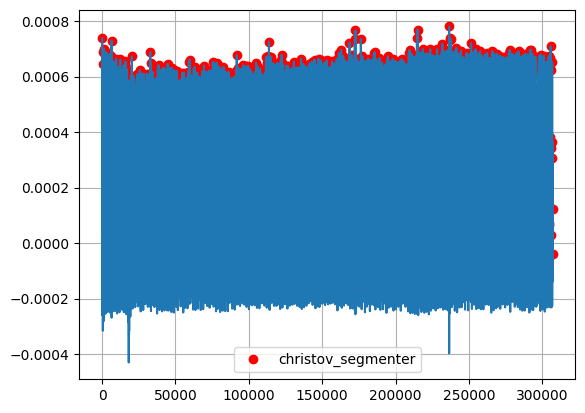

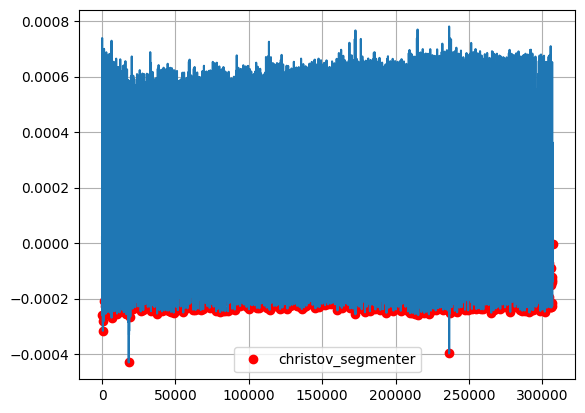

In [52]:
signal=EEGData[0].T
sfreq=512
rpeaks0=ecg.christov_segmenter(signal,sfreq)
rpeaks1=ecg.christov_segmenter(-1*signal,sfreq)
plt.figure()
plt.grid(True)
plt.plot(rpeaks0[0], signal[rpeaks0[0]], "ro", label="christov_segmenter")
plt.plot(signal)
plt.legend()
plt.show()
plt.figure()
plt.grid(True)
plt.plot(rpeaks1[0], signal[rpeaks1[0]], "ro", label="christov_segmenter")
plt.plot(signal)
plt.legend()
plt.show()

## 校正方向

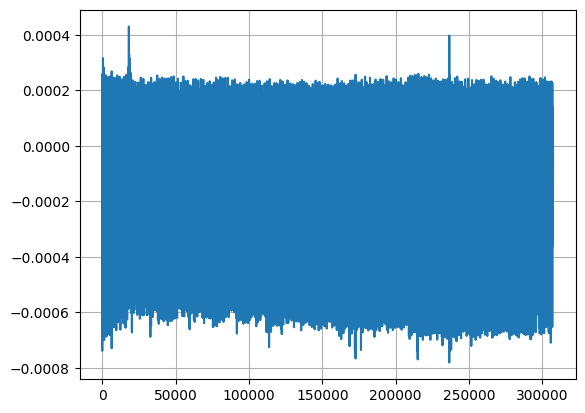

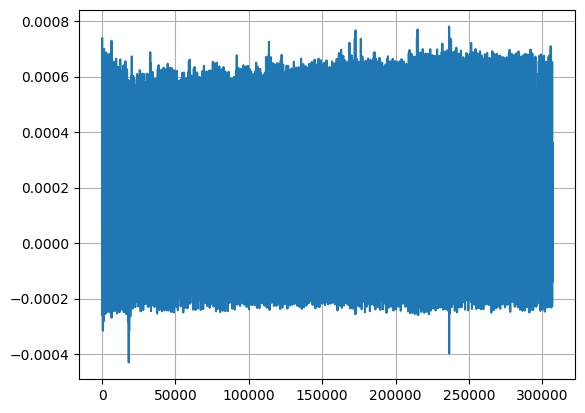

In [53]:
signal=-1*EEGData[0].T
plt.figure()
plt.grid(True)
plt.plot(signal)
plt.show()
sfreq=512
rpeaks0=ecg.christov_segmenter(signal,sfreq)
rpeaks1=ecg.christov_segmenter(-1*signal,sfreq)
if sum(signal[rpeaks0[0]])<sum(-1*signal[rpeaks1[0]]):
    signal=-1*signal
plt.figure()
plt.grid(True)
plt.plot(signal)
plt.show()

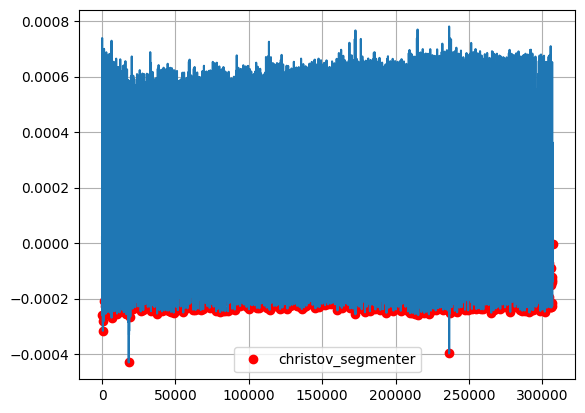

In [54]:
plt.figure()
plt.grid(True)
plt.plot(rpeaks0[0], signal[rpeaks0[0]], "ro", label="christov_segmenter")
plt.plot(signal)
plt.legend()
plt.show()

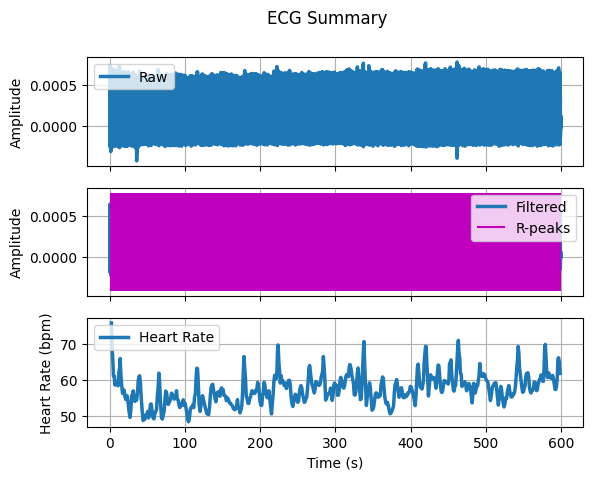

In [55]:
result=ecg.ecg(signal,sfreq)

In [56]:
result_dict=result.as_dict()

In [57]:
result_dict['heart_rate_ts']

array([  1.88476562,   2.6875    ,   3.75976562,   4.65625   ,
         5.65234375,   6.72460938,   7.73632812,   8.68554688,
         9.76953125,  10.7734375 ,  11.77734375,  12.67773438,
        13.63671875,  14.51171875,  15.625     ,  16.76171875,
        17.73046875,  18.8359375 ,  19.921875  ,  20.98828125,
        22.14257812,  23.16601562,  24.24609375,  25.5546875 ,
        26.72460938,  27.89453125,  29.02539062,  29.99023438,
        31.125     ,  32.203125  ,  33.29296875,  34.46679688,
        35.51953125,  36.61328125,  37.66015625,  38.5546875 ,
        39.5859375 ,  40.61914062,  41.61523438,  42.90625   ,
        44.17773438,  45.328125  ,  46.5703125 ,  47.86132812,
        48.93164062,  50.21289062,  51.3984375 ,  52.58398438,
        53.79882812,  54.81445312,  55.984375  ,  57.33789062,
        58.47851562,  59.671875  ,  60.90625   ,  62.00585938,
        63.1640625 ,  64.15429688,  65.1328125 ,  66.07617188,
        67.203125  ,  68.53710938,  69.734375  ,  70.88

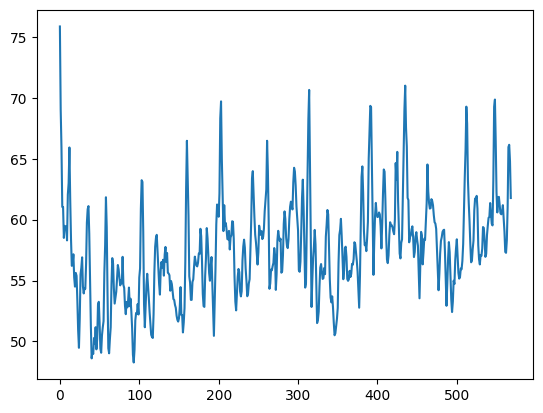

In [58]:
plt.plot(result_dict['heart_rate'])

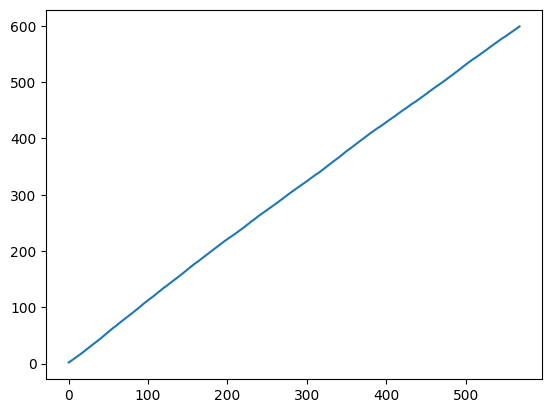

In [59]:
plt.plot(result_dict['heart_rate_ts'])

<Axes: >

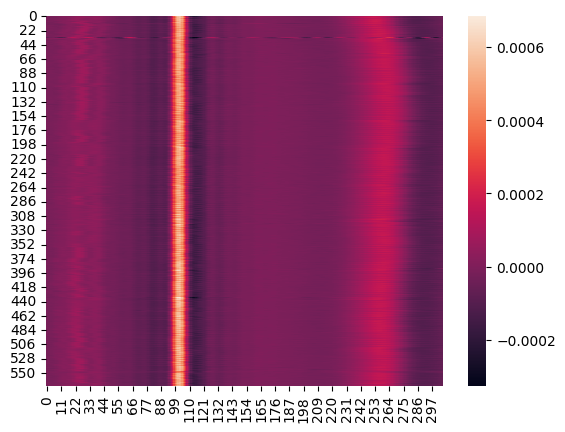

In [60]:
import seaborn as sns
sns.heatmap(result_dict['templates'])

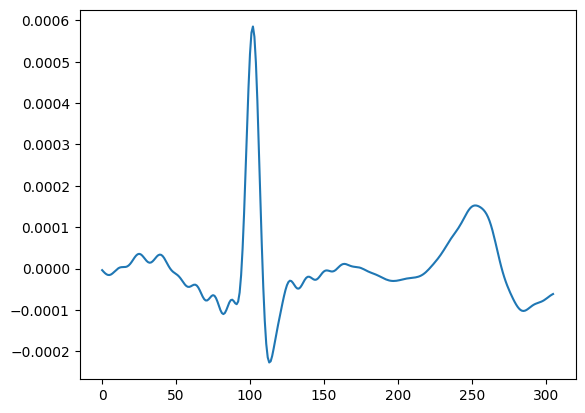

In [62]:
import pandas as pd
plt.plot(result.as_dict()['templates'][0].T)

In [108]:
result.as_dict()['templates'].shape

(108, 306)

In [120]:
from torchvision.datasets import ImageFolder
dataset=ImageFolder(r'D:\project_meta\NNproject\NNI\output\video_frames\IDFolder')
dataset[1000][0].show()